In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
N = 200
n = 4
g = 10

In [4]:
def one_approximate_ge(matrix):
    n = len(matrix) - 1
    A_eff = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            A_eff[i][j] = matrix[i][j] - g * (matrix[i][n] * matrix[n][j])/(matrix[n][n])

    return A_eff

def one_exact_ge_kamil(matrix):
    #calculate E0 each iteration
    E_tilde = min(np.linalg.eigvalsh(matrix))
    n = len(matrix) - 1
    A_eff = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            A_eff[i][j] = matrix[i][j] + (matrix[i][n] * matrix[n][j])/(E_tilde - matrix[n][n])

    return A_eff

def one_exact_ge_will(matrix, E_star):
    #Pass in E0 corresponding to E_200^*

    n = len(matrix) - 1
    A_eff = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            A_eff[i][j] = matrix[i][j] + (matrix[i][n] * matrix[n][j])/(E_star - matrix[n][n])

    return A_eff

def approximate_ge_matrix(matrix, n):

    N = len(matrix)

    for _ in range(N - n):
        matrix = one_approximate_ge(matrix)

    return matrix

def exact_ge_matrix_kamil(matrix, n):
    N = len(matrix)
    
    for _ in range(N - n):
        matrix = one_exact_ge_kamil(matrix)

    return matrix

def exact_ge_matrix_will(matrix, n):
    N = len(matrix)
    E0 = min(np.linalg.eigvalsh(matrix))
    
    for _ in range(N - n):
        matrix = one_exact_ge_will(matrix, E0)

    return matrix



In [5]:
def H_me(n ,m , g):
    return (n + 3 * g * (2 * n ** 2 + 2 * n + 1)) * delta(n, m) +\
            g * (4 * m + 6) * np.sqrt((m + 1) * (m + 2)) * delta(n, m + 2) +\
            g * (4 * n + 6) * np.sqrt((n + 1) * (n + 2)) * delta(n + 2, m) +\
            g * np.sqrt((m + 1) * (m + 2) * (m + 3) * (m + 4)) * delta(n, m + 4) +\
            g * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) * delta(n + 4, m) 

def delta(k, l):
    if k == l: return 1 
    return 0

In [6]:
H_full = np.zeros((N + 1, N + 1))

for i in range(N + 1):
    for j in range(N + 1):
        H_full[i][j] = H_me(i, j, g)

In [89]:
H_full.max()/(200**4)

0.00150764375

In [ ]:
for _ in range(N - n):
    matrix = one_exact_ge_will(matrix, E0)

In [7]:
H_prime_approx = one_approximate_ge(H_full)
H_prime_exact = one_exact_ge_kamil(H_full)

In [8]:
np.abs(np.linalg.eigvalsh(H_prime_exact)[0] - np.linalg.eigvalsh(H_prime_approx)[0])

8280172.28649382

In [9]:
Eexact_small = np.linalg.eigvalsh(exact_ge_matrix_kamil(H_full, n))[0]

In [10]:
Eexact_small

1.8262759236673165

In [11]:
(np.abs(H_prime_exact - H_prime_approx)).max()

9456112.12909565

In [12]:
Heff_approx = approximate_ge_matrix(H_full, n)
Hkamil = exact_ge_matrix_kamil(H_full, n)
Hwill = exact_ge_matrix_will(H_full, n)


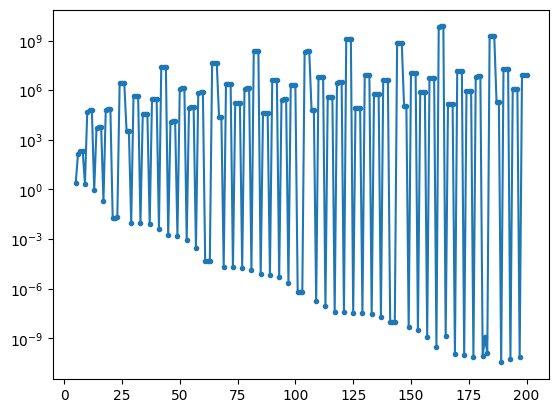

In [13]:
matrix = H_full
approx = []
approxapprox = []
Ns = []
E0 = np.linalg.eigvalsh(matrix)[0]
for i in range(N, n, -1):
    matrix = one_approximate_ge(matrix)
    Ns.append(i)
    approx.append(np.abs(E0 -  np.linalg.eigvalsh(matrix)[0]))

plt.plot(Ns[::-1], approx[::-1], marker = '.')
plt.yscale('log')
plt.show()

In [14]:
matrix = H_full
E0 = np.linalg.eigvalsh(matrix)[0]
kamil_exact = []
for i in range(N, n, -1):
    matrix = one_exact_ge_kamil(matrix)
    kamil_exact.append( np.abs(E0 - np.linalg.eigvalsh(matrix)[0]))


In [15]:
print(E0)

1.8262759236466686


In [16]:
matrix = H_full
E0 = np.linalg.eigvalsh(matrix)[0]
will_exact = []
for i in range(N, n, -1):
    matrix = one_exact_ge_will(matrix, E0)
    will_exact.append( np.abs(E0 - np.linalg.eigvalsh(matrix)[0]))



In [17]:
matrix = H_full 
E0 = np.linalg.eigvalsh(matrix)[0]
will_exact2 = []
for i in range(N, n, -1):
    matrix = one_exact_ge_will(matrix, E0)
    will_exact2.append( np.abs(E0 - np.linalg.eigvalsh(matrix)[0]))



In [18]:
from copy import deepcopy
from matplotlib.colors import LogNorm

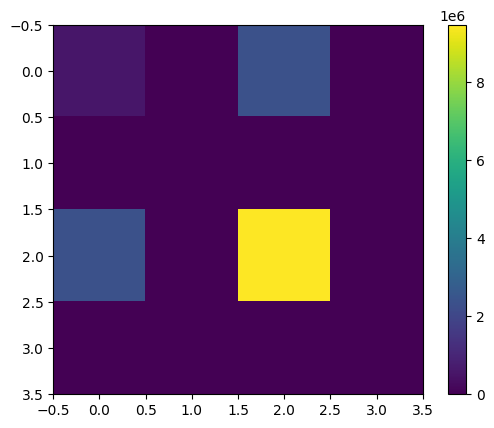

In [46]:
Hexact = one_exact_ge_kamil(H_full)
Happrox = one_approximate_ge(H_full)
diff = (Hexact - Happrox)[-4:, -4:]
plt.imshow(diff)
# plt.imshow(Happrox[-4:, -4:])
plt.colorbar()

In [48]:
np.linalg.norm(diff[-4:, -4:], ord = 2)

10035325.057575224

In [56]:
np.linalg.norm(Happrox, ord = 2)

8280170.460217888

In [50]:
Happrox2x2 = np.zeros((2, 2))
Happrox2x2[0, 0] = Happrox[-4, -4]
Happrox2x2[0, 1] = Happrox[-4, -2]
Happrox2x2[1, 0] = Happrox[-2, -4]
Happrox2x2[1, 1] = Happrox[-2, -2]

In [59]:
Hexact2x2 = np.zeros((2, 2))
Hexact2x2[0, 0] = Hexact[-4, -4]
Hexact2x2[0, 1] = Hexact[-4, -2]
Hexact2x2[1, 0] = Hexact[-2, -4]
Hexact2x2[1, 1] = Hexact[-2, -2]

In [32]:
exact_matrix = deepcopy(H_full)
approximate_matrix = deepcopy(H_full)
E0 = np.linalg.eigvalsh(exact_matrix)[0]
true_errors = []
true_second_order_errors = []
max_delta_nm = []
small_norms = []
approx_evals = []
upper_bound_small_norms = []
upper_bound_of_ground_energy = 0.6506716153419712
big_norms = []
for i in range(N, N - 1, -1):
    exact_matrix = one_exact_ge_will(exact_matrix, E0)
    exact_approximate_matrix = one_exact_ge_will(approximate_matrix, E0)
    approximate_matrix = one_exact_ge_will(approximate_matrix, 0)
    approximate_second_order_matrix = one_exact_ge_will(approximate_matrix, upper_bound_of_ground_energy)
    true_errors.append(np.abs(
        np.linalg.eigvalsh(exact_matrix)[0] - np.linalg.eigvalsh(approximate_matrix)[0]
    ))
    true_second_order_errors.append(np.abs(
        np.linalg.eigvalsh(exact_matrix)[0] - np.linalg.eigvalsh(approximate_second_order_matrix)[0]
    ))
    
    approx_evals.append(np.linalg.eigvalsh(approximate_second_order_matrix)[0])
    # print(np.linalg.eigvalsh(exact_matrix)[0])
    delta_nm = (exact_approximate_matrix - approximate_matrix).max()
    max_delta_nm.append(delta_nm)
    # plt.imshow(np.abs(exact_approximate_matrix - approximate_matrix)[-10:, -10:])#, norm=LogNorm(vmin=1e-12, vmax=10))
    # plt.colorbar()
    diff = exact_approximate_matrix - approximate_matrix
    small = np.zeros((2, 2))
    k0 = (i - 4)
    k1 = (i - 2)
    small[0, 0] = diff[-4, -4] #/ (k0**2 + k0**4)
    small[0, 1] = diff[-4, -2] #/ (k0*k1 + (k0**2)*(k1**2))
    small[1, 0] = diff[-2, -4] #/ (k0*k1 + (k0**2)*(k1**2))
    small[1, 1] = diff[-2, -2] #/ (k1**2 + k1**4)

    print(small)

    small_norms.append(np.linalg.norm(small, ord = 2))
    upper_bound_small_norm = (
        (upper_bound_of_ground_energy / (k0**2 + k0**4)) + 
        2*(upper_bound_of_ground_energy / (k0*k1 + (k0**2)*(k1**2))) + 
        (upper_bound_of_ground_energy / (k1**2 + k1**4)) 
    )
    upper_bound_small_norms.append(upper_bound_small_norm)
    # big_norms.append(np.linalg.norm(diff, ord = 2))
    # print(small_norms[-1], max(np.abs(np.linalg.eigvalsh(small))))


[[-0.04872409 -0.19687065]
 [-0.19687065 -0.79545964]]


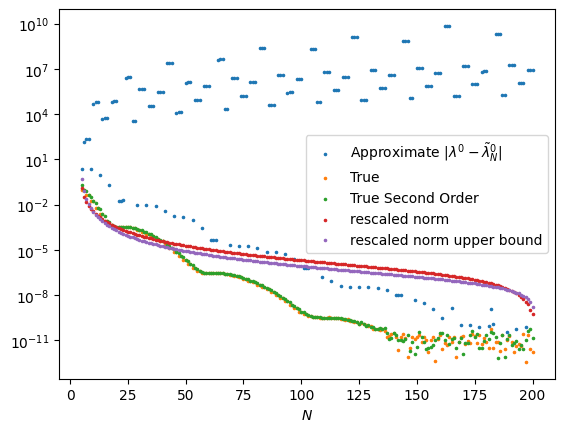

In [20]:
plt.scatter(Ns[::-1], approx[::-1], s = 10,marker = '.', label = r'Approximate $|\lambda^0 - \tilde{\lambda}^0_N|$')
plt.scatter(Ns[::-1], true_errors[::-1], s = 10,marker = '.', label = "True")
plt.scatter(Ns[::-1], true_second_order_errors[::-1], s = 10,marker = '.', label = "True Second Order")
# plt.scatter(Ns[::-1], np.cumsum(will_exact)[::-1], s = 10,marker = '.', label = r"Will Exact $\sum_{j}|\lambda^0_j - \lambda^0_{j + 1}|$")
# plt.scatter(Ns[::-1], np.cumsum(kamil_exact)[::-1], s = 10,marker = '.', label = r"Kamil Exact $\sum_{j}|\lambda^0_j - \lambda^0_{j + 1}|$")
# plt.scatter(Ns[::-1], np.cumsum(will_exact2)[::-1], s = 10,marker = '.',)
plt.scatter(Ns[::-1], np.cumsum(small_norms)[::-1], s = 10,marker = '.', label="rescaled norm")
plt.scatter(Ns[::-1], np.cumsum(upper_bound_small_norms)[::-1], s = 10,marker = '.', label="rescaled norm upper bound")
# plt.scatter(Ns[::-1], np.cumsum(will_exact3)[::-1], s = 10,marker = '.',)
# plt.scatter(Ns[::-1], max_delta_nm[::-1], label = r'$max \delta_{nm}$')
# plt.scatter(Ns[::-1], np.cumsum(max_delta_nm)[::-1], label = r'$\sum max \delta_{nm}$')
# plt.scatter(Ns[::-1], will_exact[::-1], s = 10,marker = '.', label = "Will Exact Recursion")
# plt.scatter(Ns[::-1], kamil_exact[::-1], s = 10,marker = '.', label = "Kamil Exact Recursion")
plt.yscale('log')
plt.xlabel(f'$N$')
plt.legend()
plt.show()

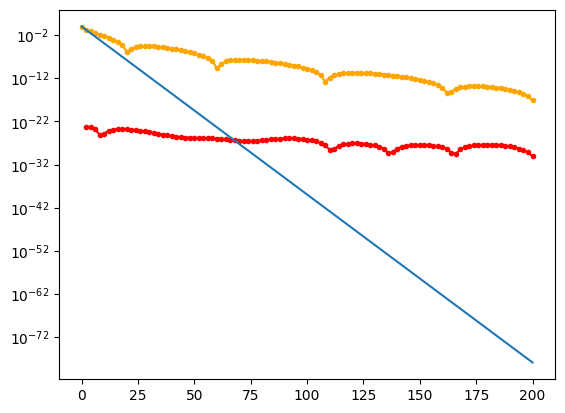

In [21]:
vals, vecs = np.linalg.eigh(H_full)
psi = np.abs(vecs[:, 0])**2
x = np.array(range(0, len(psi), 2))
plt.plot(x, psi[::2], marker = '.', color = 'orange')
plt.plot(x[1:], psi[1:][::2], marker = '.', color = 'red')
plt.plot(x, 6**(-x/2))

plt.yscale('log')
# plt.xscale('log')
# plt.hlines(0.1, 0, 200)
plt.show()

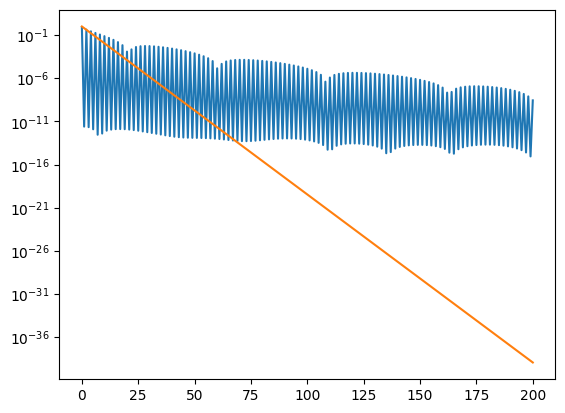

In [22]:
psi = np.abs(vecs[:,0])
N = np.arange(0, len(psi), 1)
plt.plot(N, psi)
plt.plot(N, 6**(-N/4))
plt.yscale('log')

In [23]:
(psi + (2/3)*np.roll(psi, -2) + (1/6)*np.roll(psi,-4) )/ psi

array([1.40320661e+00, 1.65516315e+00, 1.48959051e+00, 1.39951188e+00,
       1.50776442e+00, 1.21000864e+00, 1.50844550e+00, 2.41376200e+00,
       1.49947229e+00, 2.90657692e+00, 1.48161881e+00, 2.13063690e+00,
       1.45198361e+00, 1.94220109e+00, 1.40204455e+00, 1.84778996e+00,
       1.30714498e+00, 1.78573310e+00, 1.17452460e+00, 1.73962557e+00,
       2.77942400e+00, 1.70303207e+00, 2.64689756e+00, 1.67998455e+00,
       2.03871000e+00, 1.66450748e+00, 1.87909116e+00, 1.65683240e+00,
       1.80390242e+00, 1.65415920e+00, 1.75890377e+00, 1.65097684e+00,
       1.72786949e+00, 1.64861321e+00, 1.70419480e+00, 1.64905263e+00,
       1.68462078e+00, 1.66169669e+00, 1.66727541e+00, 1.68462846e+00,
       1.65090834e+00, 1.72031284e+00, 1.63452556e+00, 1.75754824e+00,
       1.61716188e+00, 1.78384095e+00, 1.59767086e+00, 1.80404494e+00,
       1.57442900e+00, 1.81474605e+00, 1.54477215e+00, 1.80947481e+00,
       1.50367831e+00, 1.79147734e+00, 1.44002297e+00, 1.77606909e+00,
      

In [24]:
-2/3 * psi[-3]-1/6 * psi[-5]

-7.904240735603455e-09

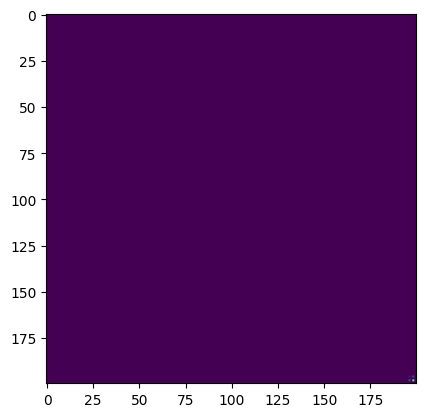

In [71]:
plt.imshow(one_exact_ge_kamil(H_full) - one_approximate_ge(H_full))

In [74]:
np.linalg.norm((one_exact_ge_kamil(H_full) - one_approximate_ge(H_full)), ord = 2), np.linalg.norm(np.array([[one_exact_ge_kamil(H_full)[-4, -4], one_exact_ge_kamil(H_full)[-4, -2]],
                                       [one_exact_ge_kamil(H_full)[-2, -4], one_exact_ge_kamil(H_full)[-2, -2]]]) - np.array([[one_approximate_ge(H_full)[-4, -4], one_approximate_ge(H_full)[-4, -2]],
                                       [one_approximate_ge(H_full)[-2, -4], one_approximate_ge(H_full)[-2, -2]]]), ord = 2)

(10035325.057575224, 10035325.057575224)

In [83]:
exact = H_full
exact_exact = H_full
approx = H_full
upper_bound = 0
upper_upper_bound = 0
for _ in range(N, n, -1):
    exact_exact = one_exact_ge_kamil(exact_exact)
    exact_approx = one_exact_ge_kamil(approx)
    approx = one_approximate_ge(approx)

    exact_exact_subspace = np.array([[exact_exact[-4, -4], exact_exact[-4, -2]],
                                       [exact_exact[-2, -4], exact_exact[-2, -2]]])

    exact_approx_subspace = np.array([[exact_approx[-4, -4], exact_approx[-4, -2]],
                                       [exact_approx[-2, -4], exact_approx[-2, -2]]])

    approx_subspace = np.array([[approx[-4, -4], approx[-4, -2]],
                                       [approx[-2, -4], approx[-2, -2]]])
    
    true_difference_overall = np.linalg.norm(exact_exact_subspace - approx_subspace, ord=2)
    true_difference_step = np.linalg.norm(exact_approx_subspace - approx_subspace, ord=2)

    upper_bound += true_difference_step
    upper_upper_bound += 2 * np.linalg.norm(approx_subspace, ord=2)
    print(2 * np.linalg.norm(approx_subspace, ord=2) >= true_difference_step, upper_bound >= true_difference_overall, upper_upper_bound >= upper_bound, true_difference_overall, upper_bound, true_difference_step)

    # LHS = np.linalg.norm(np.array([[exact[-4, -4], exact[-4, -2]],
    #                                    [exact[-2, -4], exact[-2, -2]]]) - np.array([[approx[-4, -4], approx[-4, -2]],
    #                                    [approx[-2, -4], approx[-2, -2]]]), ord = 2)
    # # RHS = np.linalg.norm(np.array([[exact[-4, -4], exact[-4, -2]],
    # #                                    [exact[-2, -4], exact[-2, -2]]]), ord = 2) +\
    # RHS = 2 * np.linalg.norm(np.array([[approx[-4, -4], approx[-4, -2]],
    #                                    [approx[-2, -4], approx[-2, -2]]]), ord = 2)

    # print(LHS <= RHS, LHS, RHS)

True True True 10035325.057575224 10035325.057575224 10035325.057575224
True True True 9934409.284248894 20826456.52543256 10791131.467857337
False True True 2043372.0535421409 31275570.281202674 10449113.755770113
False True True 2022627.661417467 41619470.41573117 10343900.134528495
False True True 2288088.226675932 45263678.214704975 3644207.7989738076
False True True 2264576.937911729 48983695.369888164 3720017.1551831914
True True True 2519464.0301110004 53962138.61803465 4978443.24814649
True True True 2493233.5647458895 58888988.9432472 4926850.325212546
True True True 19069577.32396824 78641551.31004426 19752562.366797056
True True True 18869947.861712165 100138282.34758067 21496731.037536412
False True True 3725040.132102524 122185279.20048727 22046996.8529066
False True True 3685614.7116193147 144001109.04466408 21815829.844176814
True True True 636955.2055002946 146194266.91168198 2193157.8670178875
True True True 630149.5148431148 148374254.44638556 2179987.5347035844
True 